# Random Forest
### Trainer : - Rajesh Jakhotia

In [1]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


In [2]:
#Load the Dataset
RFDF_dev = pd.read_csv("DEV_SAMPLE.csv")
RFDF_holdout = pd.read_csv("HOLDOUT_SAMPLE.csv")

In [3]:
print( RFDF_dev.shape,  RFDF_holdout.shape)

(14000, 10) (6000, 10)


In [4]:
RFDF_dev.head(10)

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,C16505,0,41,M,91519.92,SELF-EMP,38,41-45,926,15
1,C17241,0,52,M,117288.96,SAL,17,>50,768,13
2,C18802,0,31,F,259827.44,SENP,8,31-35,816,5
3,C19289,0,45,F,26677.55,PROF,14,41-45,353,18
4,C14028,0,39,F,43440.31,SENP,1,36-40,751,31
5,C17960,0,45,M,403324.49,SENP,11,41-45,364,2
6,C10216,1,33,M,245500.00,SAL,24,31-35,166,9
7,C4575,0,26,F,464931.92,SELF-EMP,18,26-30,448,28
8,C6171,0,38,M,49257.03,SAL,19,36-40,237,5
9,C484,1,44,M,10791.71,SELF-EMP,17,41-45,678,3


In [5]:
## Get Frequency of 0 and 1
target_freq = pd.crosstab(index=RFDF_dev['Target'], 
                             columns="count",
                             )

target_freq['prop'] = target_freq/target_freq.sum()
target_freq

col_0,count,prop
Target,,
0,12765,0.911786
1,1235,0.088214


In [6]:
#Data Preprocessing
#Splitting into features and response variables
X =  RFDF_dev[['Age', 'Gender', 'Balance', 'Occupation',
               'No_OF_CR_TXNS', 'AGE_BKT', 'SCR', 'Holding_Period']]

#Categorical Variable to Numerical Variables
X_train = pd.get_dummies(X)
print(X_train.columns)


y_train = RFDF_dev["Target"]

print (type(X_train) , type(y_train))

Index(['Age', 'Balance', 'No_OF_CR_TXNS', 'SCR', 'Holding_Period', 'Gender_F',
       'Gender_M', 'Gender_O', 'Occupation_PROF', 'Occupation_SAL',
       'Occupation_SELF-EMP', 'Occupation_SENP', 'AGE_BKT_26-30',
       'AGE_BKT_31-35', 'AGE_BKT_36-40', 'AGE_BKT_41-45', 'AGE_BKT_46-50',
       'AGE_BKT_<25', 'AGE_BKT_>50'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [7]:
X_train.iloc[0]

Age                          41
Balance                91519.92
No_OF_CR_TXNS                38
SCR                         926
Holding_Period               15
Gender_F                  False
Gender_M                   True
Gender_O                  False
Occupation_PROF           False
Occupation_SAL            False
Occupation_SELF-EMP        True
Occupation_SENP           False
AGE_BKT_26-30             False
AGE_BKT_31-35             False
AGE_BKT_36-40             False
AGE_BKT_41-45              True
AGE_BKT_46-50             False
AGE_BKT_<25               False
AGE_BKT_>50               False
Name: 0, dtype: object

### Random Forest Classifier

In [8]:
rf = RandomForestClassifier(max_depth = 10, 
                                min_samples_split=100, 
                                n_estimators = 101,
                                random_state = 1212)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=100, n_estimators=101,
                       random_state=1212)

### Variable Importance

In [9]:
# !pip3 install scikit-plot

Features sorted by their importance:
0.284 Holding_Period
0.1671 No_OF_CR_TXNS
0.1353 Balance
0.1208 SCR
0.0721 Occupation_SELF-EMP
0.0538 Age
0.039 Occupation_SENP
0.0354 Occupation_SAL
0.0179 Gender_F
0.0162 AGE_BKT_41-45
0.0152 Occupation_PROF
0.0106 Gender_M
0.0063 AGE_BKT_36-40
0.0059 Gender_O
0.0045 AGE_BKT_46-50
0.0044 AGE_BKT_<25
0.0044 AGE_BKT_26-30
0.0037 AGE_BKT_31-35
0.0035 AGE_BKT_>50


<Axes: title={'center': 'Feature Importance'}>

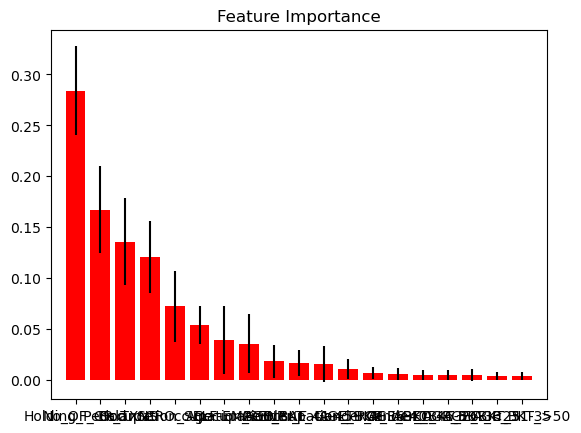

In [10]:
## Plot Variable Importance
## pip install scikit-plot
import scikitplot as skplt
names = X_train.columns
names 

feat_imp = sorted(
            zip(map(lambda x: round(x, 4), rf.feature_importances_), 
                names), 
            reverse=True
            )

print ("Features sorted by their importance:")
for s in feat_imp:
    print(*s)

skplt.estimators.plot_feature_importances(rf,  feature_names = names )


### Model Performance Measure
### Overfitting

In [11]:
rf = RandomForestClassifier(max_depth = 4, 
                                min_samples_split=100, 
                                n_estimators = 101,
                                random_state = 1212)

rf.fit(X_train, y_train)

## Predict Probability
RFDF_dev["Predict_score"] = rf.predict_proba(X_train)[:,1]

In [12]:

auc = roc_auc_score(RFDF_dev["Target"],
              RFDF_dev["Predict_score"])

print("Train AUC: ", auc)


Train AUC:  0.7940650596028171


In [13]:
## AUC for Hold Out dataset

X_holdout =  RFDF_holdout[['Age', 'Gender', 'Balance', 'Occupation',
               'No_OF_CR_TXNS', 'AGE_BKT', 'SCR', 'Holding_Period']]
X_test = pd.get_dummies(X_holdout)
RFDF_holdout["Predict_score"] = rf.predict_proba(X_test)[:,1]

ho_auc = roc_auc_score(RFDF_holdout["Target"],
              RFDF_holdout["Predict_score"])
print("Hold Out AUC: ", ho_auc)

Hold Out AUC:  0.763701479856175


### RandomizedSearchCV

In [14]:
np.linspace(start = 50, stop = 125, num = 5)

array([ 50.  ,  68.75,  87.5 , 106.25, 125.  ])

In [15]:
## Tuning the Random Forest using RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 125, num = 5)]
# Number of features to consider at every split
max_features = [2,3,4]
# Maximum number of levels in tree
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,}
print(random_grid)


{'n_estimators': [50, 68, 87, 106, 125], 'max_features': [2, 3, 4], 'min_samples_split': [100, 200, 300, 400, 500]}


In [16]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(warm_start = True)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 10, cv = 10, scoring = 'roc_auc',
                               verbose=2, random_state=1212, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(warm_start=True),
                   n_jobs=-1,
                   param_distributions={'max_features': [2, 3, 4],
                                        'min_samples_split': [100, 200, 300,
                                                              400, 500],
                                        'n_estimators': [50, 68, 87, 106, 125]},
                   random_state=1212, scoring='roc_auc', verbose=2)

In [17]:
rf_random.best_params_

{'n_estimators': 87, 'min_samples_split': 100, 'max_features': 4}

In [18]:
rf_random.best_score_

0.7875966182709131

In [19]:
best_rf_clf = rf_random.best_estimator_

In [20]:
## Hold out performance
X_holdout =  RFDF_holdout[['Age', 'Gender', 'Balance', 'Occupation',
               'No_OF_CR_TXNS', 'AGE_BKT', 'SCR', 'Holding_Period']]
X_test = pd.get_dummies(X_holdout)
RFDF_holdout["Predict_score"] = best_rf_clf.predict_proba(X_test)[:,1]
roc_auc_score(RFDF_holdout["Target"],
              RFDF_holdout["Predict_score"])

0.7774901861170599

### Rank Ordering & KS

In [21]:
## decile code
def deciles(x):
    decile = pd.Series(index=[0,1,2,3,4,5,6,7,8,9])
    for i in np.arange(0.1,1.1,0.1):
        decile[int(i*10)]=x.quantile(i)
    def z(x):
        if x<decile[1]:
            return(1)
        elif x<decile[2]:
            return(2)
        elif x<decile[3]:
            return(3)
        elif x<decile[4]:
            return(4)
        elif x<decile[5]:
            return(5)
        elif x<decile[6]:
            return(6)
        elif x<decile[7]:
            return(7)
        elif x<decile[8]:
            return(8)
        elif x<decile[9]:
            return(9)
        elif x<=decile[10]:
            return(10)
        else:
            return(np.NaN)
    s=x.map(z)
    return(s) 

In [22]:
def RO_Table(X,y,Target):
    X['decile']=deciles(X[y])
    Rank=X.groupby('decile').apply(lambda x: pd.Series([
        np.min(x[y]),
        np.max(x[y]),
        np.mean(x[y]),
        np.size(x[y]),
        np.sum(x[Target]),
        np.size(x[Target][x[Target]==0]),
        ],
        index=(["min_resp","max_resp","avg_resp","cnt","cnt_resp","cnt_non_resp"])
        )).reset_index()
    Rank = Rank.sort_values(by='decile',ascending=False)
    Rank["rrate"] = round(Rank["cnt_resp"]*100/Rank["cnt"],2)
    Rank["cum_resp"] = np.cumsum(Rank["cnt_resp"])
    Rank["cum_non_resp"] = np.cumsum(Rank["cnt_non_resp"])
    Rank["cum_resp_pct"] = round(Rank["cum_resp"]/np.sum(Rank["cnt_resp"]),2)
    Rank["cum_non_resp_pct"] = round(Rank["cum_non_resp"]/np.sum(Rank["cnt_non_resp"]),2)
    Rank["KS"] = round(Rank["cum_resp_pct"] - Rank["cum_non_resp_pct"],2)
    Rank
    return(Rank)

Rank = RO_Table(RFDF_dev,"Predict_score","Target")
KS_dev = max(Rank.KS)

Rank_holdout = RO_Table(RFDF_holdout,"Predict_score","Target")
KS_hold = max(Rank_holdout.KS)

print("KS Dev Sample : ", KS_dev ,"; KS Holdout Sample : " , KS_hold)


KS Dev Sample :  0.44 ; KS Holdout Sample :  0.41


In [23]:
Rank_holdout

,decile,min_resp,max_resp,avg_resp,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
9,10,0.189280,0.536085,0.266231,600.0,188.0,412.0,31.33,188.0,412.0,0.38,0.07,0.31
8,9,0.134115,0.189273,0.158138,600.0,84.0,516.0,14.00,272.0,928.0,0.55,0.17,0.38
7,8,0.103648,0.134078,0.118347,600.0,56.0,544.0,9.33,328.0,1472.0,0.66,0.27,0.39
6,7,0.080147,0.103620,0.090978,600.0,58.0,542.0,9.67,386.0,2014.0,0.78,0.37,0.41
5,6,0.061666,0.080073,0.070631,600.0,35.0,565.0,5.83,421.0,2579.0,0.85,0.47,0.38
4,5,0.045393,0.061665,0.053206,600.0,26.0,574.0,4.33,447.0,3153.0,0.90,0.57,0.33
3,4,0.033745,0.045376,0.039430,600.0,18.0,582.0,3.00,465.0,3735.0,0.93,0.68,0.25
2,3,0.025646,0.033730,0.029660,600.0,15.0,585.0,2.50,480.0,4320.0,0.96,0.79,0.17
1,2,0.017571,0.025620,0.021460,600.0,8.0,592.0,1.33,488.0,4912.0,0.98,0.89,0.09
0,1,0.001931,0.017568,0.012905,600.0,10.0,590.0,1.67,498.0,5502.0,1.00,1.00,0.00


### Thank you